<a href="https://colab.research.google.com/github/hosseinmou3avi/work-with-data/blob/main/my_regression_saber_kolgar_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: connect to github

!git clone https://github.com/<username>/<repository_name>.git


In [2]:
!git clone https://github.com/hosseinmou3avi/work-with-data.git

Cloning into 'work-with-data'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 185.21 KiB | 3.09 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [4]:
data=make_regression(n_samples=1000,n_features=5,noise=0.2,random_state=42)

In [7]:
data[0].shape

(1000, 5)

In [8]:
data[1].shape


(1000,)

In [9]:
x=data[0]
y=data[1]


In [10]:
x[0]

array([ 2.05654356,  0.60685059,  0.48268789, -1.13088844,  0.42009449])

In [11]:
y[0]

74.8638525346159

In [12]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler =StandardScaler()
x=scaler.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape
y_train.shape

(800,)

In [21]:
import tensorflow as tf



In [23]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(5,)))
model.add(tf.keras.layers.Dense(units=16,activation='relu' ))
model.add(tf.keras.layers.Dense(units=16,activation='relu' ))
model.add(tf.keras.layers.Dense(units=1,activation='linear' ))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
opt=tf.optimizers.Adam()
loss=tf.losses.MeanSquaredError()

model.compile(loss=loss,optimizer=opt)



In [29]:
model.fit(x_train,y_train,epochs=100,batch_size=50,validation_split=0.1,verbose=2)

Epoch 1/100
15/15 - 0s - loss: 3478.6091 - val_loss: 4037.6890 - 186ms/epoch - 12ms/step
Epoch 2/100
15/15 - 0s - loss: 3353.7139 - val_loss: 3880.1499 - 97ms/epoch - 6ms/step
Epoch 3/100
15/15 - 0s - loss: 3205.1638 - val_loss: 3701.3774 - 98ms/epoch - 7ms/step
Epoch 4/100
15/15 - 0s - loss: 3038.2178 - val_loss: 3496.2090 - 55ms/epoch - 4ms/step
Epoch 5/100
15/15 - 0s - loss: 2853.1445 - val_loss: 3270.7876 - 68ms/epoch - 5ms/step
Epoch 6/100
15/15 - 0s - loss: 2646.0681 - val_loss: 3031.6299 - 51ms/epoch - 3ms/step
Epoch 7/100
15/15 - 0s - loss: 2426.6865 - val_loss: 2774.0508 - 68ms/epoch - 5ms/step
Epoch 8/100
15/15 - 0s - loss: 2197.5811 - val_loss: 2502.5933 - 75ms/epoch - 5ms/step
Epoch 9/100
15/15 - 0s - loss: 1960.7717 - val_loss: 2230.9653 - 58ms/epoch - 4ms/step
Epoch 10/100
15/15 - 0s - loss: 1719.8759 - val_loss: 1956.5442 - 75ms/epoch - 5ms/step
Epoch 11/100
15/15 - 0s - loss: 1485.3048 - val_loss: 1689.4460 - 49ms/epoch - 3ms/step
Epoch 12/100
15/15 - 0s - loss: 1261.30

In [31]:
model.evaluate(x_train,y_train)

25/25 [==============================] - 0s 1ms/step - loss: 22.1754


22.175376892089844

In [34]:
model.evaluate(x_test,y_test) # if our model wokes well the losse must be near last cell around 22

7/7 [==============================] - 0s 2ms/step - loss: 25.7061


25.70608139038086

In [35]:
y_pred=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [37]:
print(y_pred.shape)
y_test.shape


(200, 1)


(200,)

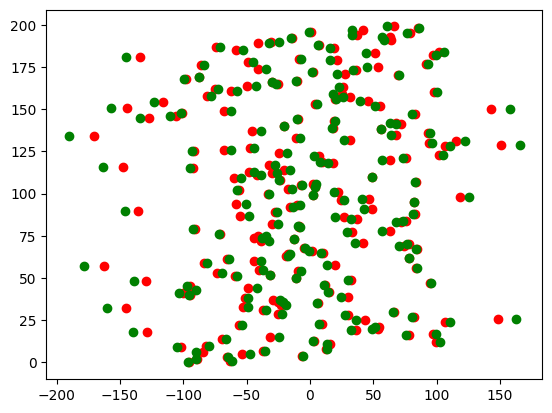

In [40]:
plt.scatter(y_pred,range(200),color='red')
plt.scatter(y_test,range(200),color='green')